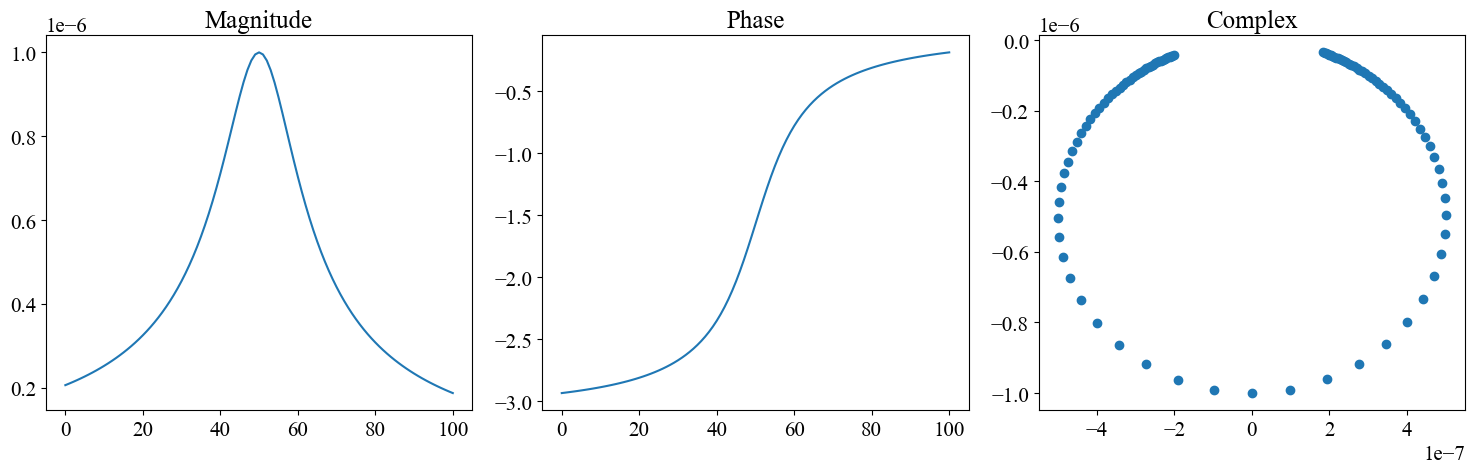

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.constants
import sys
sys.path.append('..')
from reflectarray import element
from reflectarray.reflectarray import Reflectarray
from reflectarray.feed import Feed
from reflectarray.system import System

# %matplotlib qt                    # plots in an interactive window

C = scipy.constants.c
f = 10E9
lam = C/f

patch1 = element.Patch(f=f, Q=25, lattice_vectors=np.array([[0, 1, 0]]), normalize=True)
patch1.alpha = patch1.alpha * 1E-6
patch1.plot()

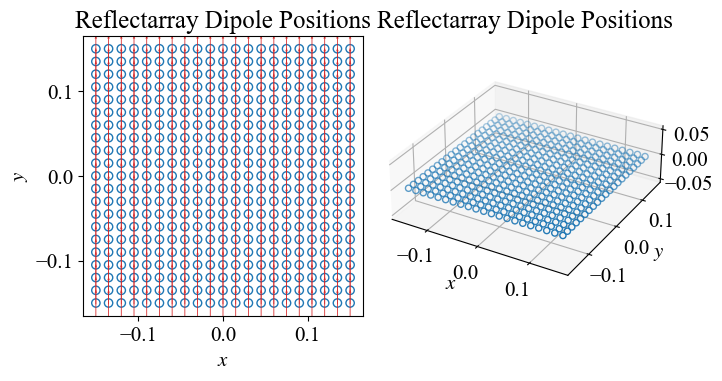

In [2]:
L = 10*lam
delta_x = lam/2
delta_y = lam/2
x = np.arange(-L/2, L/2+delta_x, delta_x)
y = np.arange(-L/2, L/2+delta_y, delta_y)

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

array = Reflectarray(patch1, x=x, y=y)
array.plot(ax=ax1, show_lattice_vectors=True)

array.plot(ax=ax2)

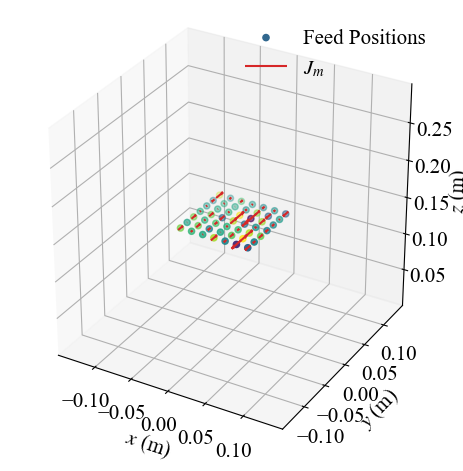

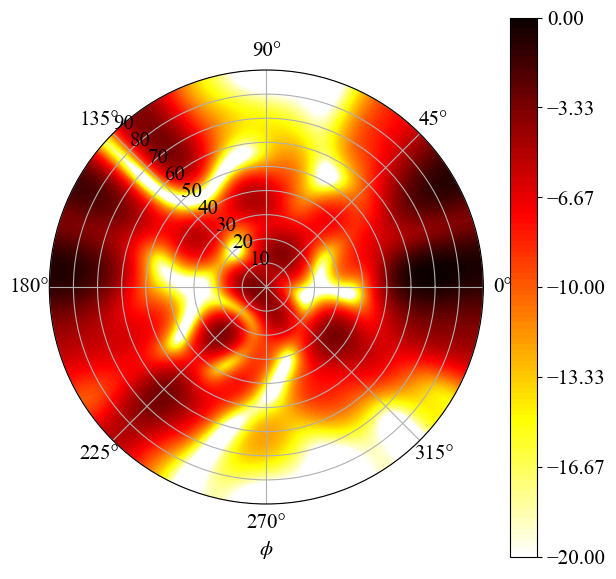

In [64]:
Lx_ms = 3*lam
Ly_ms = 3*lam
delta_x_ms = lam/2
delta_y_ms = lam/2
x_ms = np.arange(-Lx_ms/2, Lx_ms/2+delta_x_ms, delta_x_ms)
y_ms = np.arange(-Ly_ms/2, Ly_ms/2+delta_y_ms, delta_y_ms)
X_ms, Y_ms = np.meshgrid(x_ms, y_ms, indexing='ij')
Z_ms = np.zeros_like(X_ms)
r_ms = np.stack((X_ms.flatten(), Y_ms.flatten(), Z_ms.flatten()), axis=1)
J_m = np.random.randn(r_ms.shape[0]) + 1j*np.random.randn(r_ms.shape[0])
J_m = np.stack((np.zeros_like(J_m), J_m, np.zeros_like(J_m)), axis=1)

feed = Feed(x=x_ms, y=y_ms, J_m=J_m, f=f, rotation=(0, 0, 0), r_offset=(0, 0, 5*lam))
feed.plot(quiver=True, plot_type='3D', plot_value='J_m', component='y')
feed.far_field_propagate(1, 2)
feed.plot_fields(plot_type='2D', dB_min=-20)

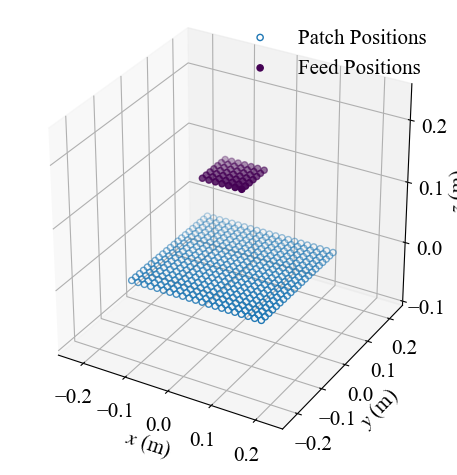

In [65]:
system1 = System(array, feed)
system1.plot()

Computing feed fields...
Computing ideal polarizabilities...
Computing constrained polarizabilities...


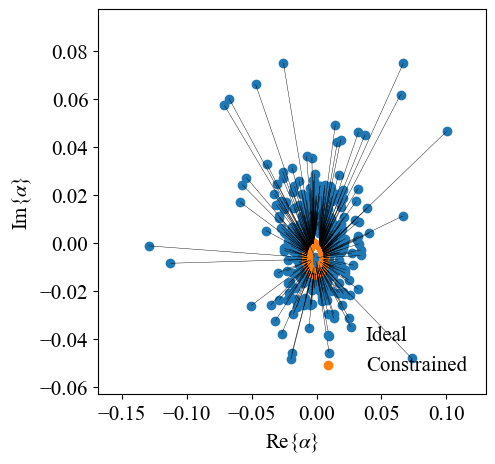

In [66]:
system1.design(theta_beam=25, phi_beam=0, mapping='euclidean', R_far=100, scale=.1)
system1.plot_mapping(lattice_index=0, scale=1.3)

In [67]:
system1.propagate(delta_theta=1, delta_phi=2)

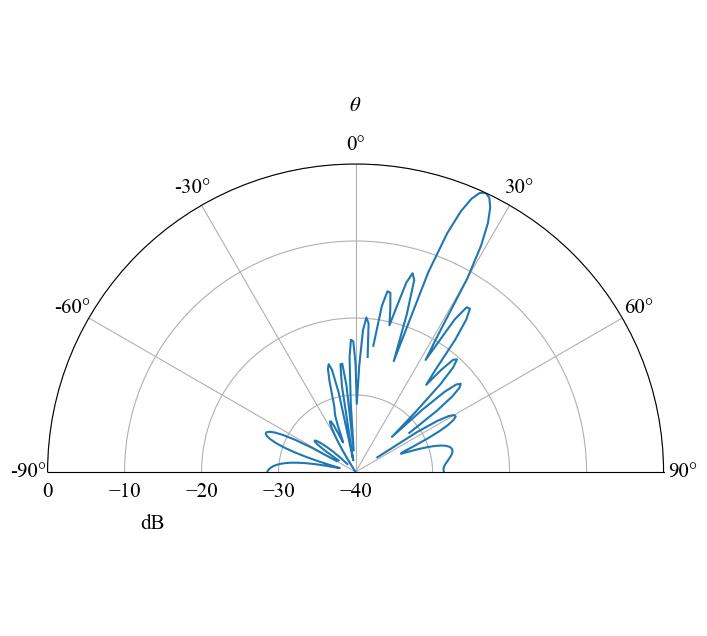

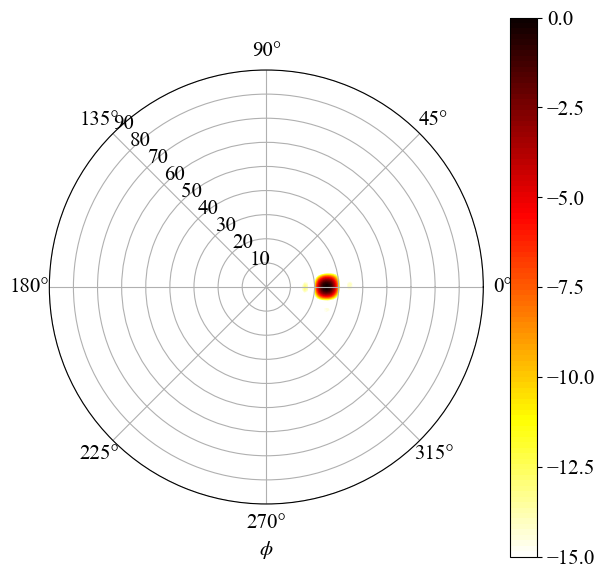

In [68]:
system1.plot_fields(plot_type='1D', phi_slice=0, dB_min=-40)
system1.plot_fields(plot_type='2D', dB_min=-15)

In [23]:
system1.calculate_beam_metrics()

Beamwidth: 55.07 degrees
Directivity: 11.67 dB
Gain: -26.22 dB
Efficiency: 0.02%
